## Install

In [ ]:
!pip install yfinance

In [ ]:
!pip install ipywidgets

## Import Libraries

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from datetime import datetime
print("All imported")

## Few Example Symbols for Companies

### International Companies
1. Apple - AAPL
2. Microsoft - MSFT
3. Google - GOOGL
4. Amazon - AMZN
5. Tesla - TSLA

### India Companies 
Note: Use .NS for NSE (National Stock Exchange)
1. Reliance - RELIANCE.NS
2. Infosys - INFY.NS
3. Tata Consultancy Services - TCS.NS
4. HDFC Bank - HDFCBANK.NS
5. Larsen & Toubro - LT.NS

#### **Comparing International and Indian Companies will not provide accurate results




## Plot for a specific company

In [16]:
# Company input 
stock_input = widgets.Text(values='', description = 'Ticker: ') 
display (stock_input)

# Date Input
start_input = widgets.Text(value='2020-01-01', description='Start Date:')
end_input = widgets.Text(value=datetime.today().strftime('%Y-%m-%d'), description='End Date:')
display(start_input, end_input)

Text(value='', description='Ticker: ')

Text(value='2020-01-01', description='Start Date:')

Text(value='2025-06-29', description='End Date:')

[*********************100%***********************]  1 of 1 completed


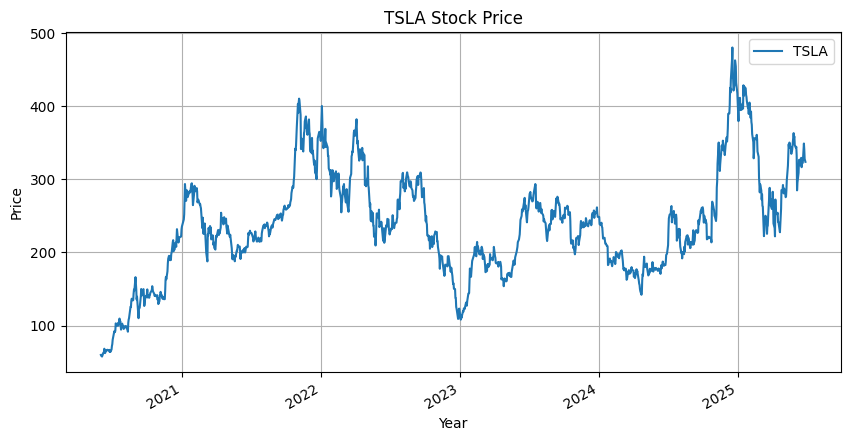

In [15]:
ticker = stock_input.value  
data = yf.download(ticker, start= start_date, end= end_date, auto_adjust=True)
data['Close'].plot(figsize=(10, 5), title=f'{ticker} Stock Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.savefig(f"{ticker}_stock_plot.png")
plt.show()

## Plot for Comparing Companies 
This will also 
1. Let you input start and end date, and
2. How many and which companies you want to compare. 

#### Select number of Companies

In [ ]:
num_input = widgets.BoundedIntText(
    value=2, 
    min=2,
    max=10, 
    step=1,
    description='How many companies: '
)
display(num_input)

#### Other Inputs

In [ ]:
# Tickers and dates input 
start_input = widgets.Text(value='2020-01-01', description='Start Date:')
end_input = widgets.Text(value=datetime.today().strftime('%Y-%m-%d'), description='End Date:')

ticker_inputs = [widgets.Text(value='', description=f'Ticker {i+1}:') for i in range(num_input.value)]

# Display
display(start_input, end_input)
for inp in ticker_inputs:
    display(inp)

#### Plot 

In [ ]:
from datetime import datetime

# Validate
try:
    start_date = datetime.strptime(start_input.value, "%Y-%m-%d").strftime('%Y-%m-%d')
    end_date = datetime.strptime(end_input.value, "%Y-%m-%d").strftime('%Y-%m-%d')
except ValueError:
    print("Invalid date format. Use YYYY-MM-DD.")
    raise

# Valid Tickets
tickers = [ti.value.upper().strip() for ti in ticker_inputs if ti.value.strip() != '']

plt.figure(figsize=(12, 6))

# Download Data for each ticker
for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date, auto_adjust=True, progress=False)
    
    if data.empty:
        print(f"No data for {ticker}")
        continue

    plt.plot(data.index, data['Close'], label=ticker)  # plotting lines 
    
# Plot
plt.title(f"Stock Prices ({start_date} to {end_date})")
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("stock_plot.png")
plt.show()